In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
import io
import os
import warnings
warnings.filterwarnings("ignore")

In [3]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

In [4]:
telcom = pd.read_csv(r"C:\Users\Ark\Desktop\Python Projects\EDA\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [5]:
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
telcom.shape

(7043, 21)

In [7]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [8]:
telcom.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
telcom.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [10]:
telcom.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [11]:
telcom.gender.value_counts()
    

Male      3555
Female    3488
Name: gender, dtype: int64

In [12]:
telcom.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


In [13]:
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
dtelcom = telcom.drop('customerID', axis=1)

In [15]:
dtelcom.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
dtelcom.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [17]:
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn']

In [18]:
make_dist = dtelcom.groupby(cols).size()

In [22]:
make_dist = []
for i in cols:
    make_dist.append(dtelcom.groupby(i).size())

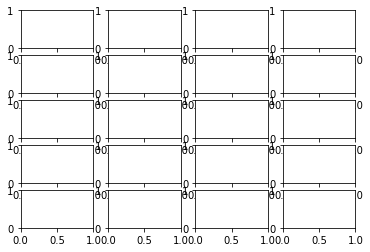

In [30]:
fig, ax = plt.subplots(5, 4)

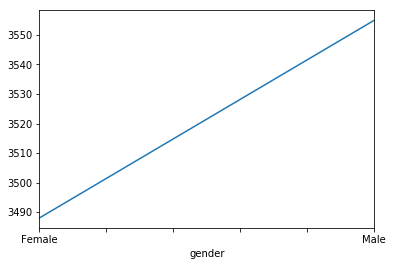

In [31]:
make_dist[0].plot()


In [36]:
gender = dtelcom.groupby('tenure').size()

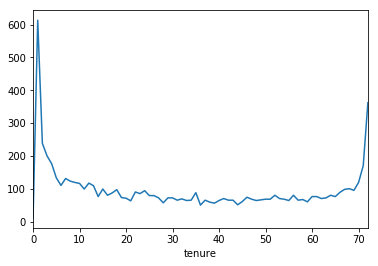

In [37]:
gender.plot()

In [34]:
make_dist[0]

gender
Female    3488
Male      3555
dtype: int64

In [35]:
for i in make_dist:
    print("\n", i, "\n")


 gender
Female    3488
Male      3555
dtype: int64 


 SeniorCitizen
0    5901
1    1142
dtype: int64 


 Partner
No     3641
Yes    3402
dtype: int64 


 Dependents
No     4933
Yes    2110
dtype: int64 


 tenure
0      11
1     613
2     238
3     200
4     176
5     133
6     110
7     131
8     123
9     119
10    116
11     99
12    117
13    109
14     76
15     99
16     80
17     87
18     97
19     73
20     71
21     63
22     90
23     85
24     94
25     79
26     79
27     72
28     57
29     72
     ... 
43     65
44     51
45     61
46     74
47     68
48     64
49     66
50     68
51     68
52     80
53     70
54     68
55     64
56     80
57     65
58     67
59     60
60     76
61     76
62     70
63     72
64     80
65     76
66     89
67     98
68    100
69     95
70    119
71    170
72    362
Length: 73, dtype: int64 


 PhoneService
No      682
Yes    6361
dtype: int64 


 MultipleLines
No                  3390
No phone service     682
Yes                 2971
dty

In [38]:
num_data = dtelcom.select_dtypes(include=['float64', 'int64'])

In [39]:
num_data.head()

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70


In [44]:
dtelcom[0]

KeyError: 0

In [56]:
ntelcom = dtelcom.replace('Yes', 1)

In [46]:
ntelcom = ntelcom.replace('No', 0)

In [57]:
ntelcom = ntelcom.replace('No phone service', 0)

In [58]:
ntelcom = ntelcom.replace('No internet service', 0)

In [50]:
ntelcom.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [59]:
num_data = dtelcom.select_dtypes(include=['float64', 'int64', 'int'])

In [60]:
num_data.head()

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70


In [61]:
ntelcom.info

<bound method DataFrame.info of       gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0       1         No       1           No   
1       Male              0      No         No      34            1   
2       Male              0      No         No       2            1   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2            1   
5     Female              0      No         No       8            1   
6       Male              0      No          1      22            1   
7     Female              0      No         No      10           No   
8     Female              0       1         No      28            1   
9       Male              0      No          1      62            1   
10      Male              0       1          1      13            1   
11      Male              0      No         No      16            1   
12      Male              0       1         N

In [54]:
ntelcom.describe

<bound method NDFrame.describe of       gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0     Female              0        1           0       1             0   
1       Male              0        0           0      34             1   
2       Male              0        0           0       2             1   
3       Male              0        0           0      45             0   
4     Female              0        0           0       2             1   
5     Female              0        0           0       8             1   
6       Male              0        0           1      22             1   
7     Female              0        0           0      10             0   
8     Female              0        1           0      28             1   
9       Male              0        0           1      62             1   
10      Male              0        1           1      13             1   
11      Male              0        0           0      16             1   
12  

In [63]:
num_data['Churn'] = ntelcom['Churn']

In [66]:
num_data.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn
0,0,1,29.85,0
1,0,34,56.95,0
2,0,2,53.85,1
3,0,45,42.30,0
4,0,2,70.70,1


In [65]:
num_data = num_data.replace('No', 0)

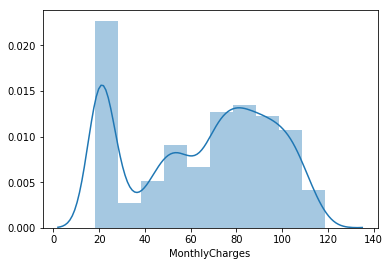

In [67]:
sns.distplot(num_data['MonthlyCharges'], bins = 10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017721CFA2E8>,
      dtype=object)

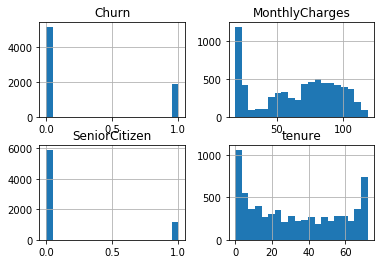

In [68]:
num_data.hist(bins=20)

In [69]:
data_corr = num_data.corr()['Churn'][:-1]

In [70]:
data_corr

SeniorCitizen     0.150889
tenure           -0.352229
MonthlyCharges    0.193356
Name: Churn, dtype: float64

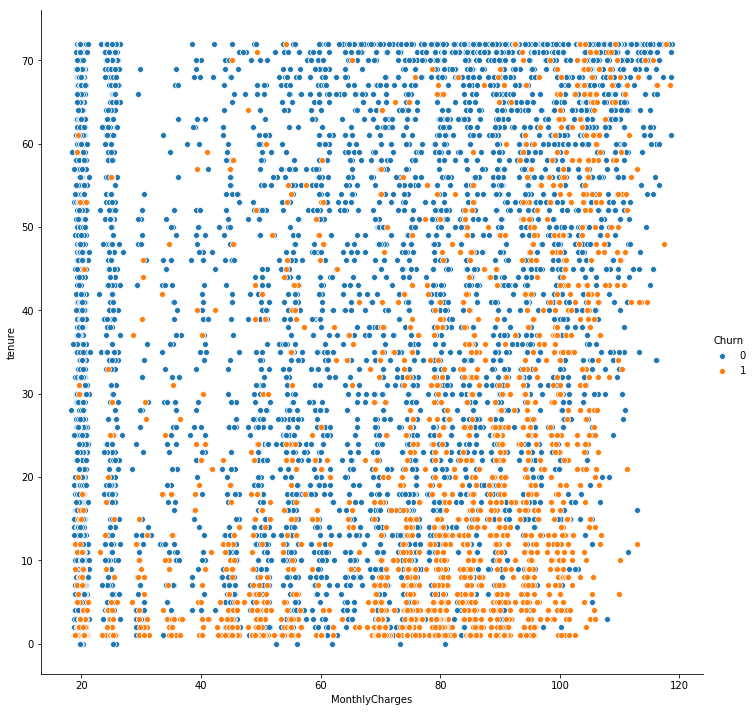

In [84]:
sns.pairplot(num_data, y_vars=['tenure'], x_vars=['MonthlyCharges'], height=10, hue='Churn')

In [76]:
No_Churn = num_data.loc[num_data['Churn'] == 0]

In [77]:
No_Churn.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn
0,0,1,29.85,0
1,0,34,56.95,0
3,0,45,42.30,0
6,0,22,89.10,0
7,0,10,29.75,0


In [78]:
Churned = num_data.loc[num_data['Churn'] == 1]

In [79]:
Churned.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn
2,0,2,53.85,1
4,0,2,70.70,1
5,0,8,99.65,1
8,0,28,104.80,1
13,0,49,103.70,1


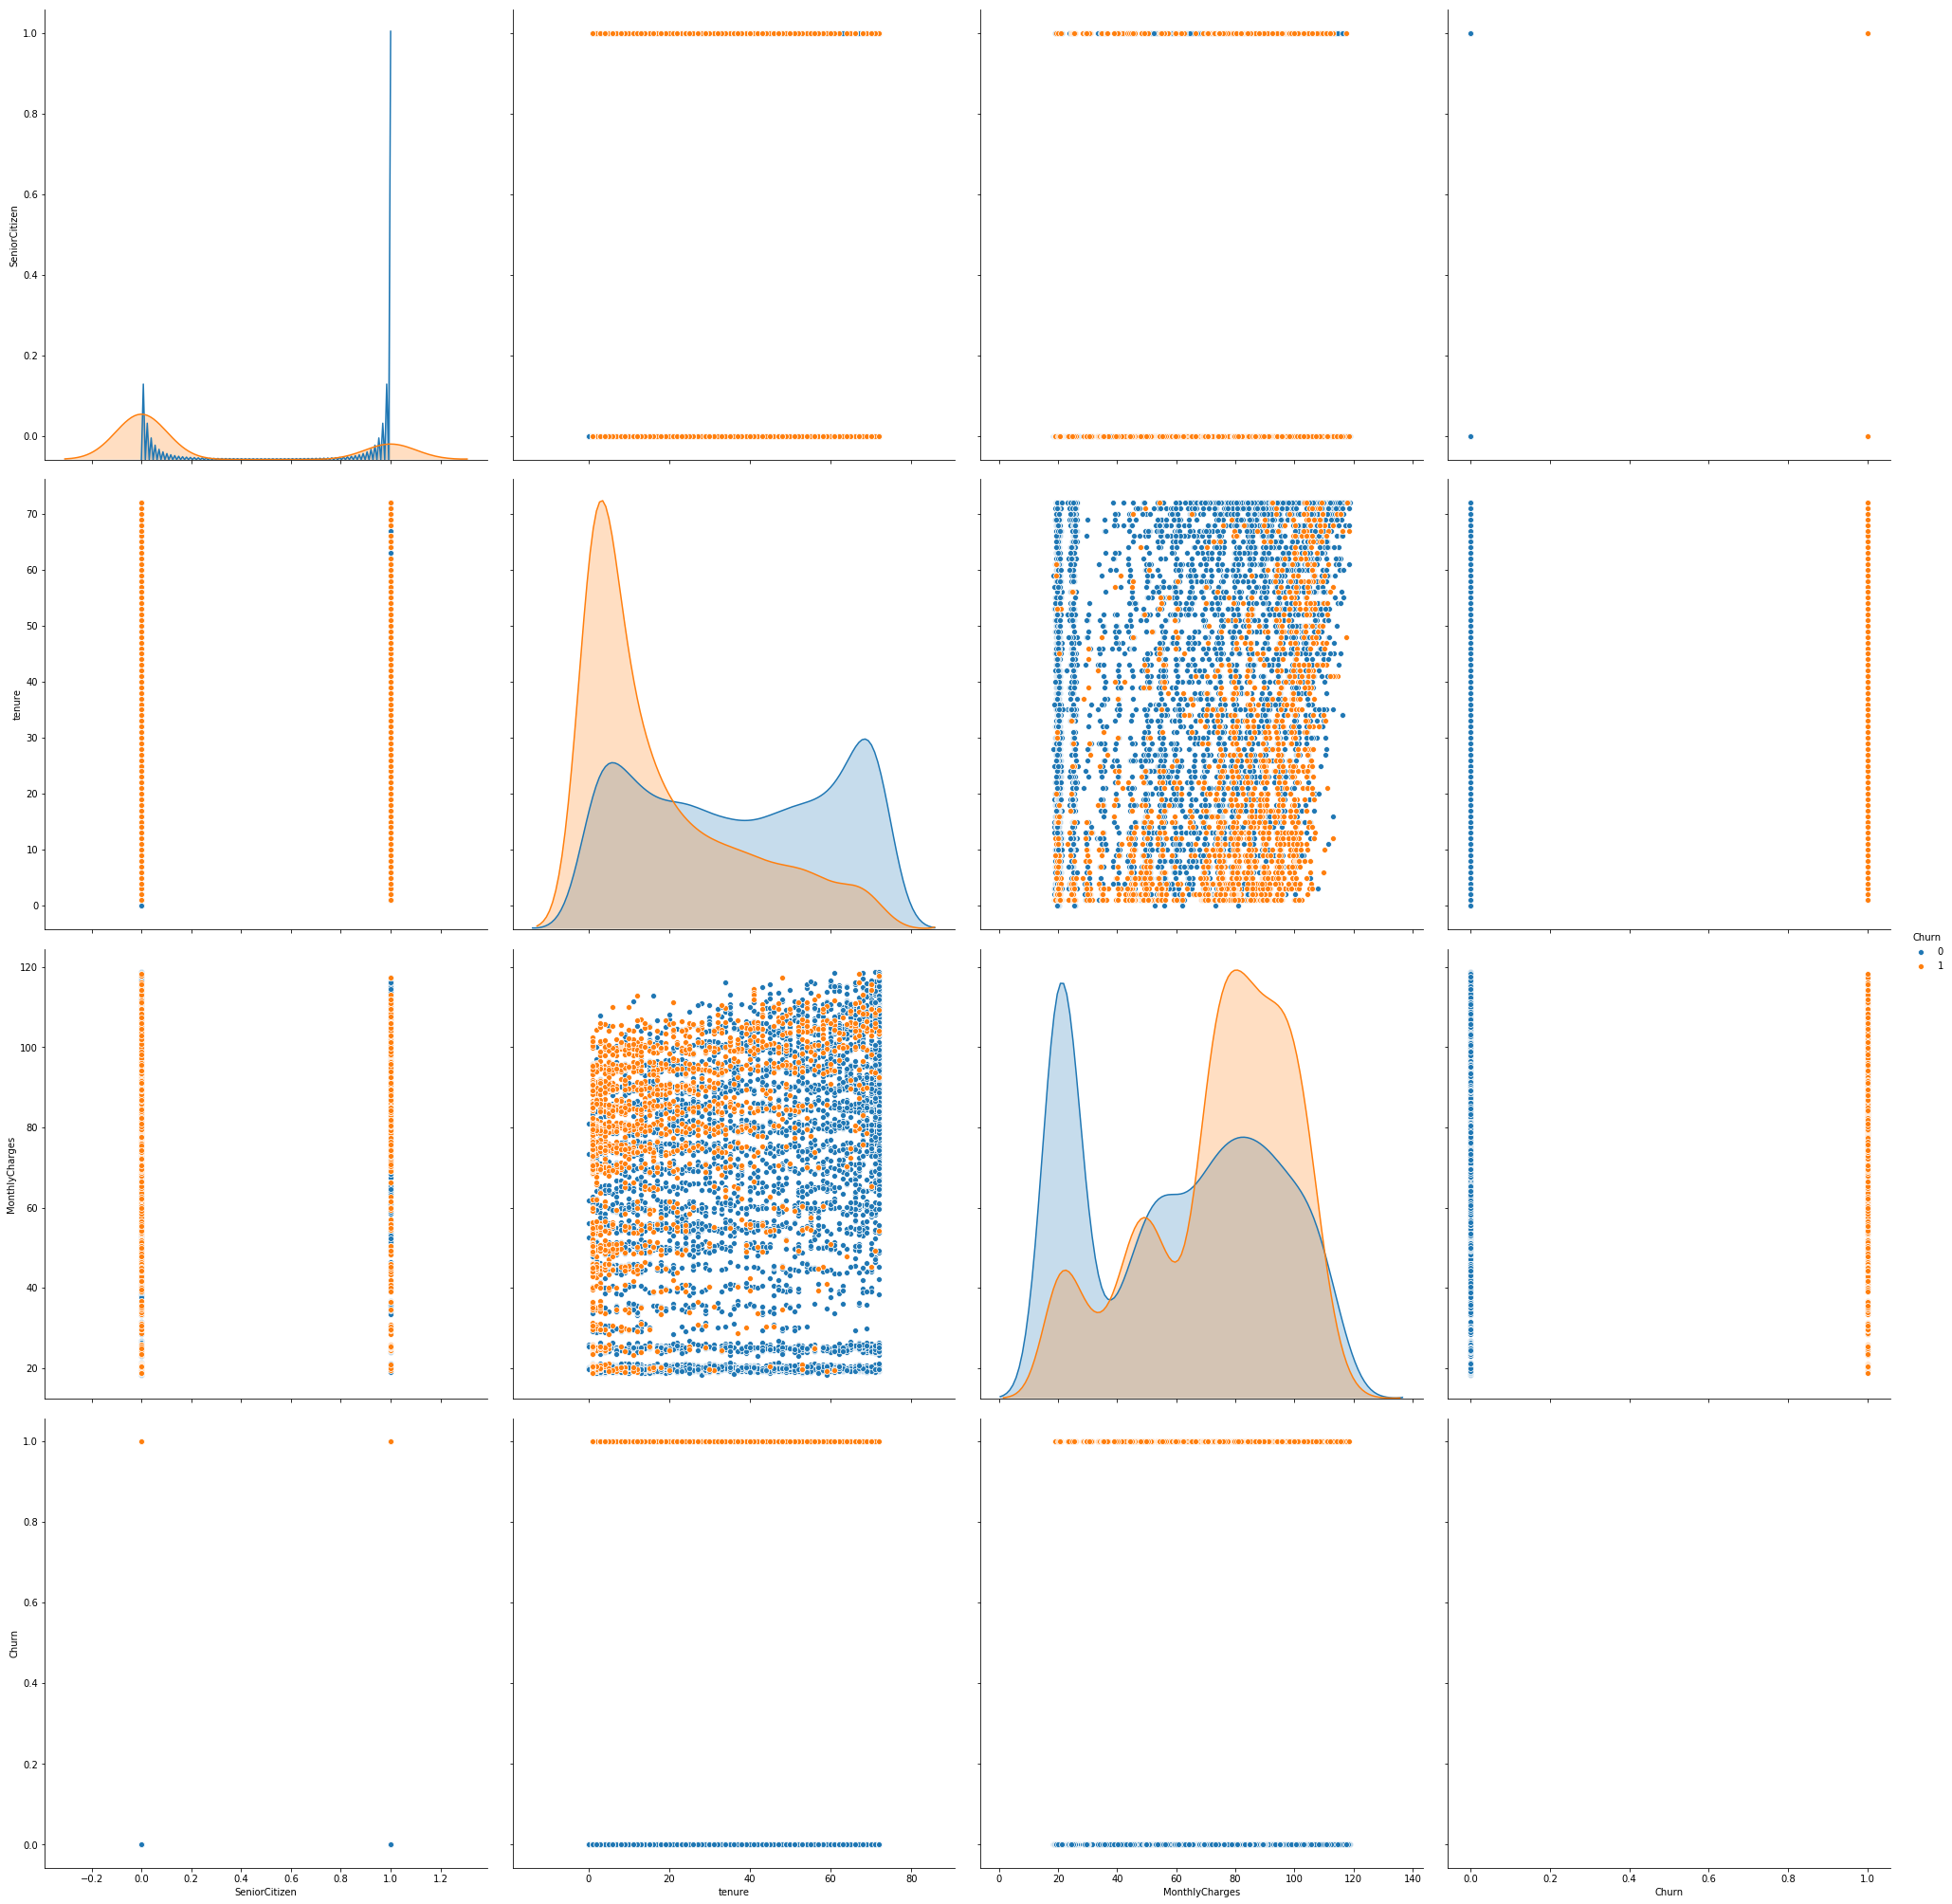

In [89]:
sns.pairplot(num_data, height = 7, hue='Churn')

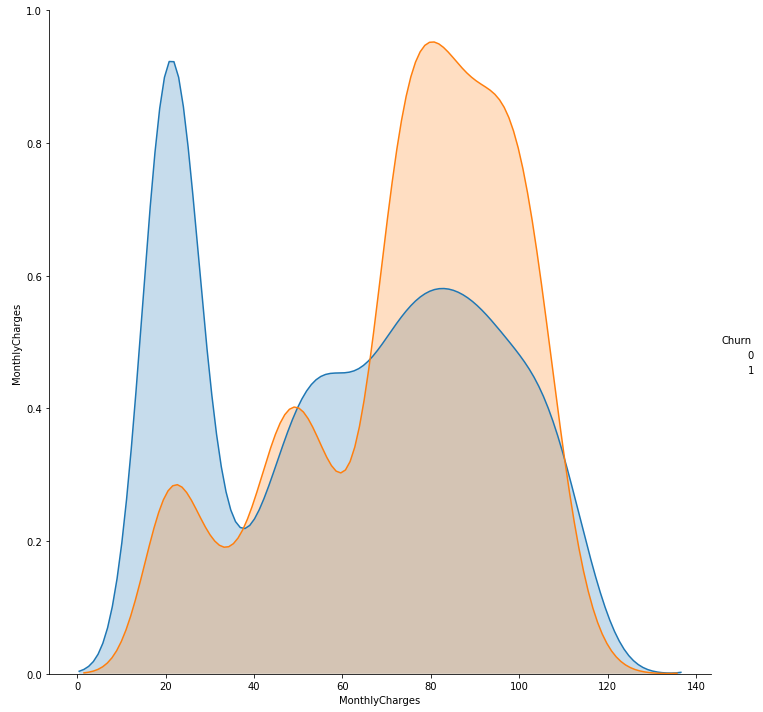

In [90]:
sns.pairplot(num_data, y_vars=['MonthlyCharges'], x_vars=['MonthlyCharges'], height=10, hue='Churn')

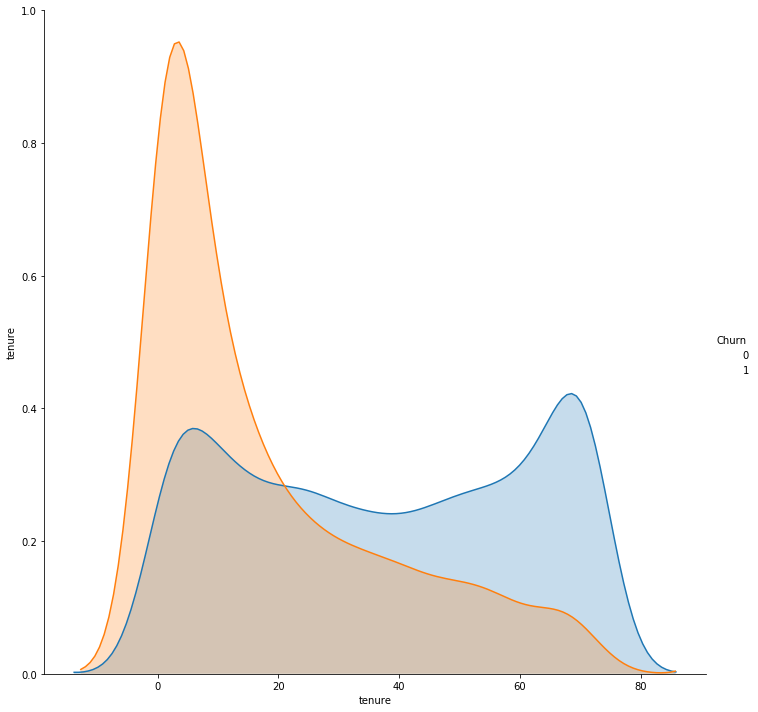

In [96]:
sns.pairplot(num_data, y_vars=['tenure'], x_vars=['tenure'], height=10, hue='Churn')

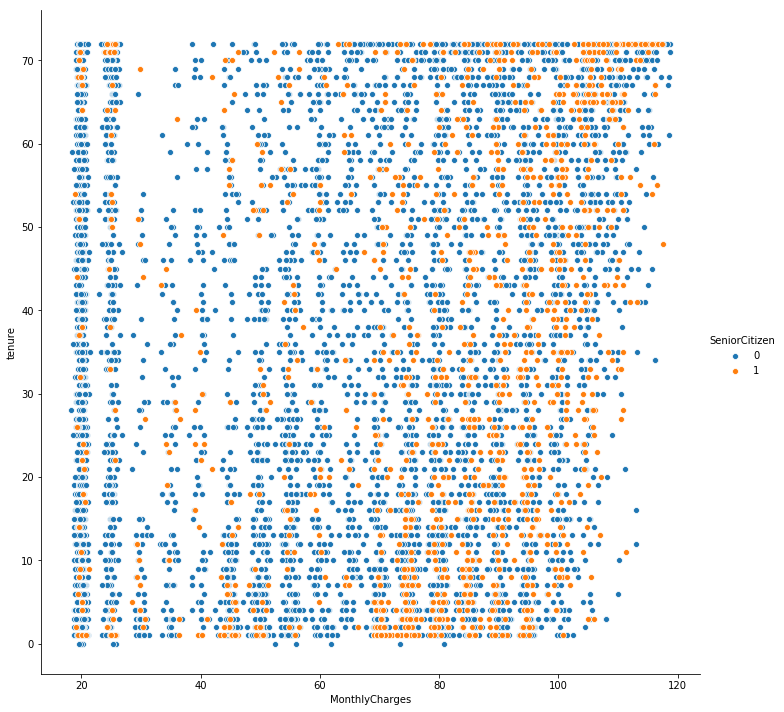

In [97]:
sns.pairplot(num_data, y_vars=['tenure'], x_vars=['MonthlyCharges'], height=10, hue='SeniorCitizen')

In [100]:
ntelcom.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [99]:
ntelcom=ntelcom.replace('No', 0)

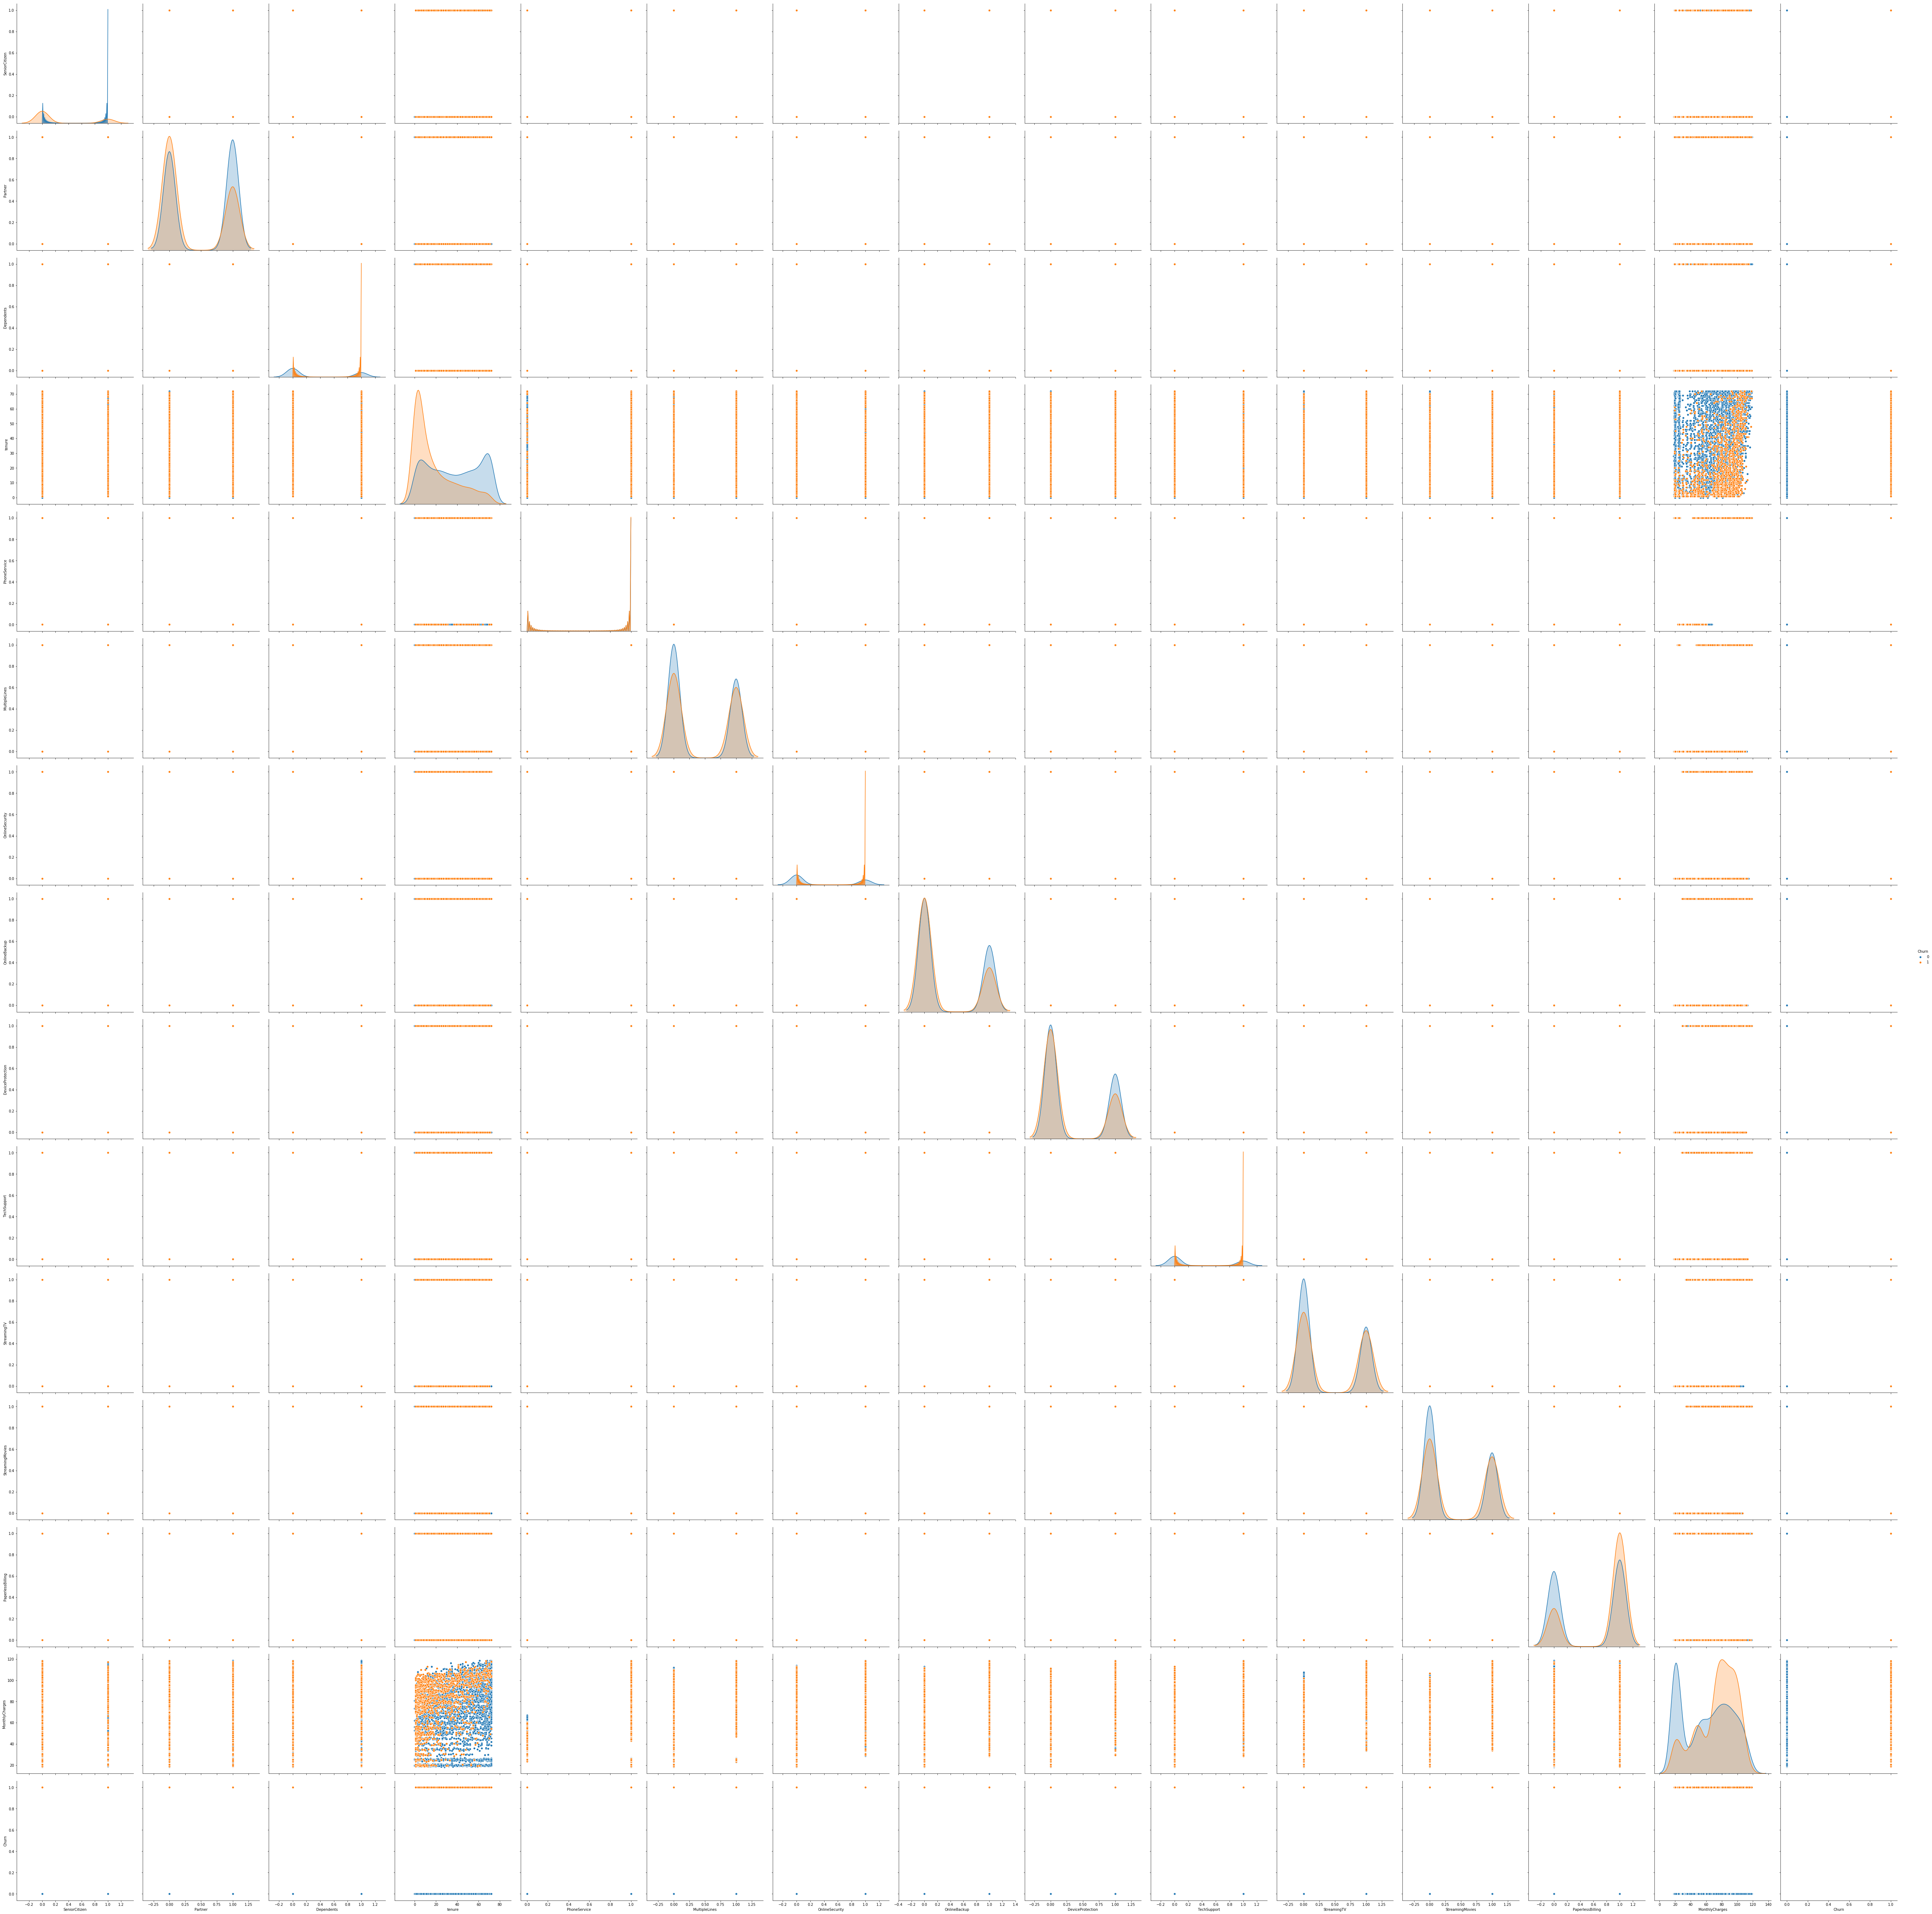

In [105]:
sns.pairplot(ntelcom, hue='Churn', height=5)

ValueError: could not convert string to float: 'Month-to-month'

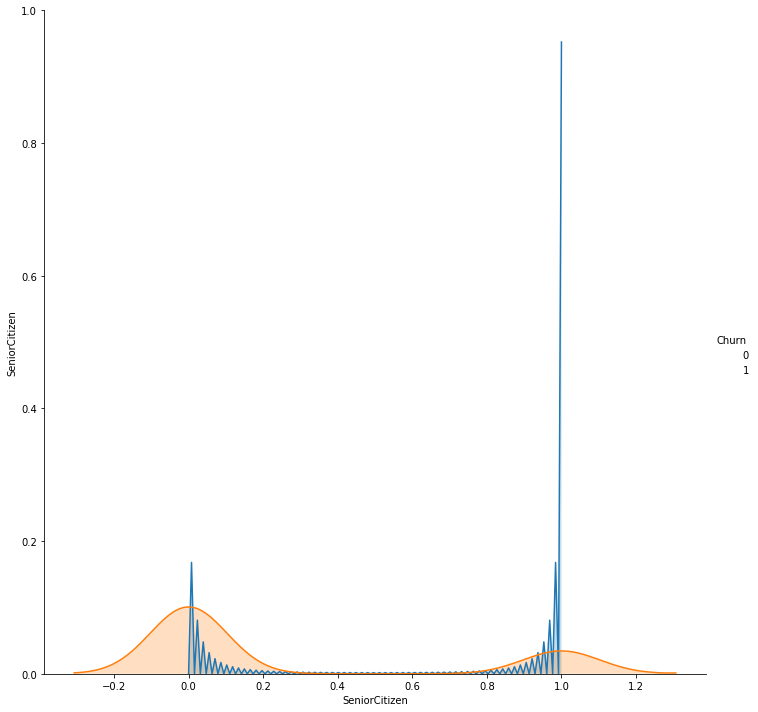

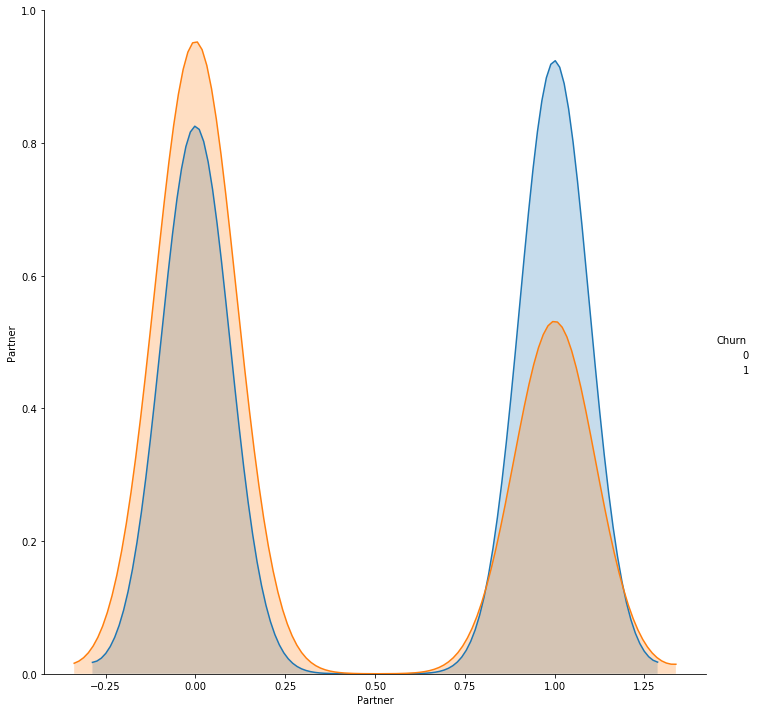

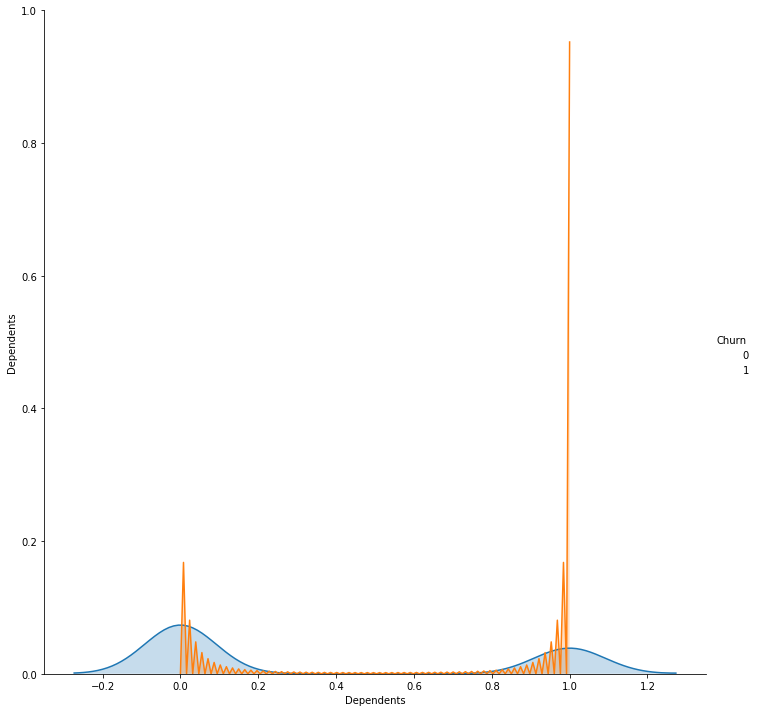

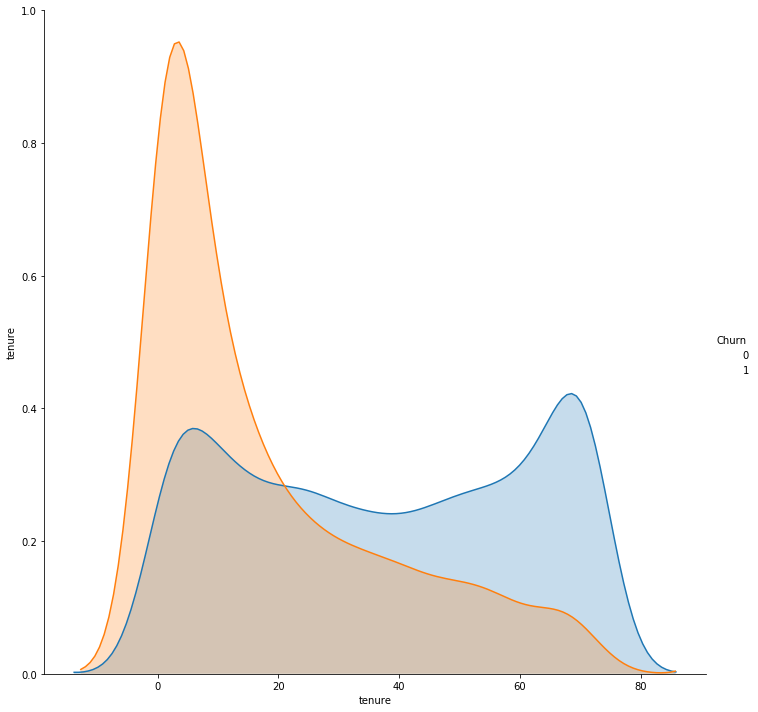

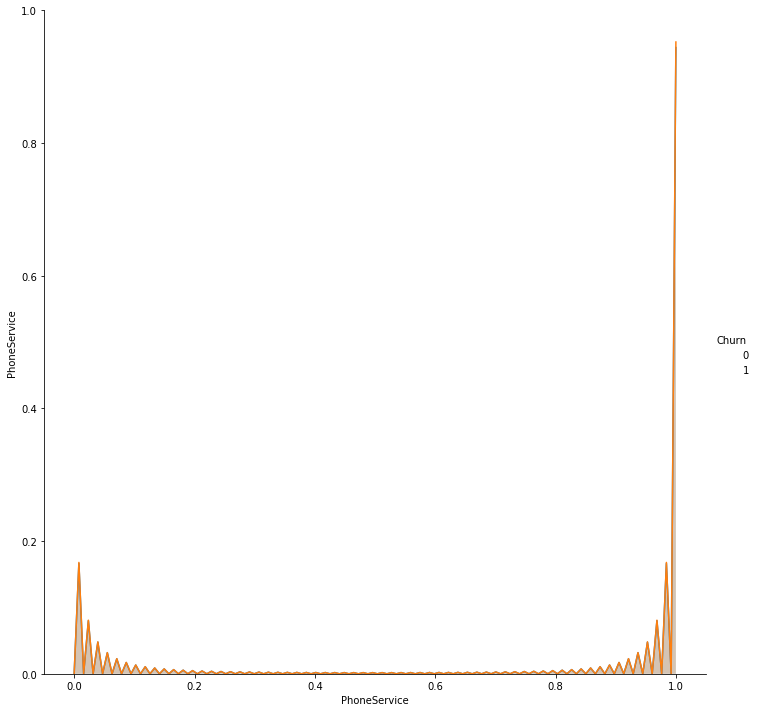

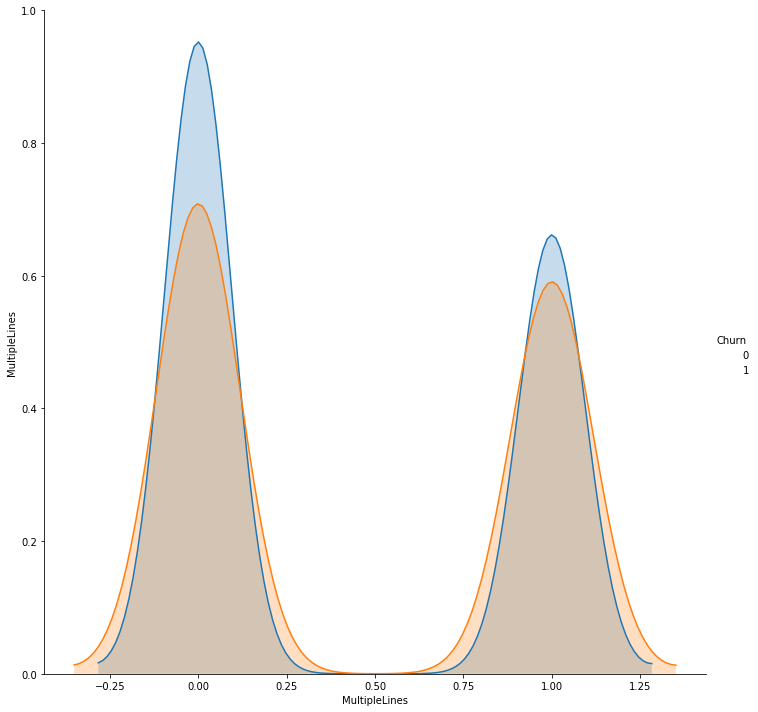

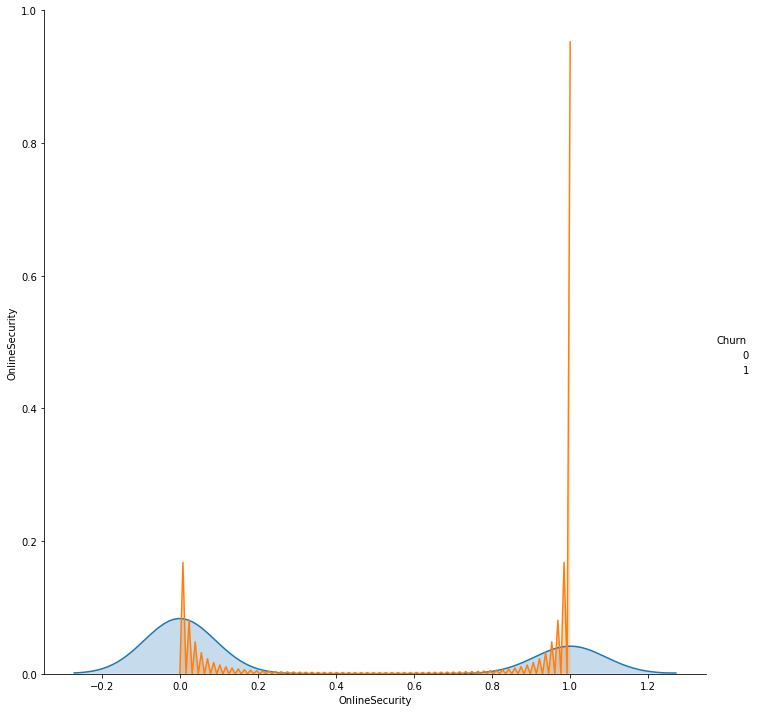

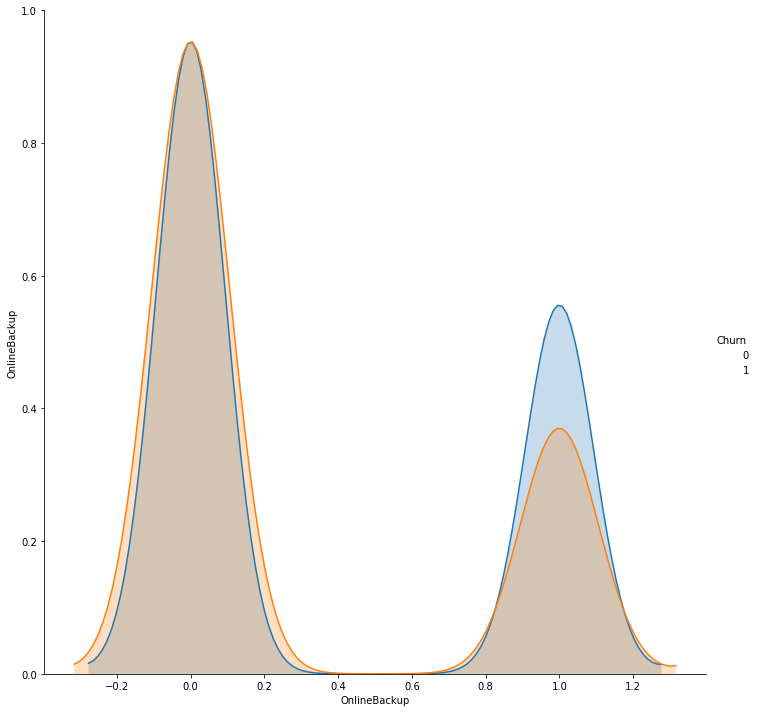

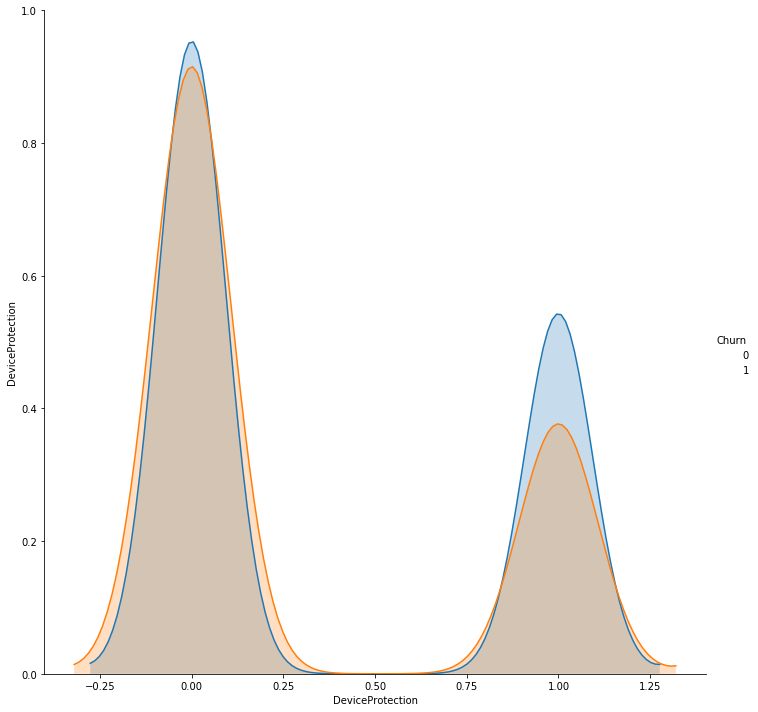

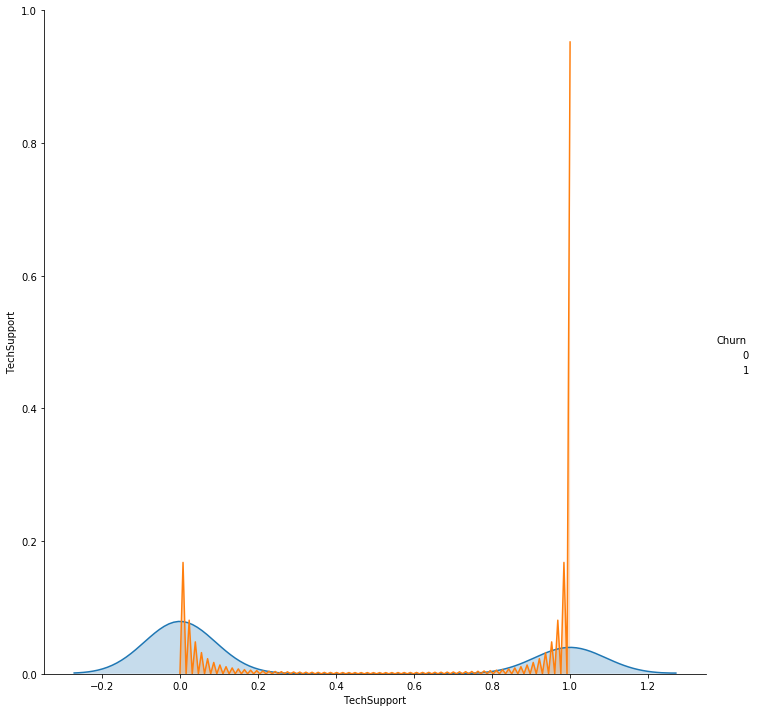

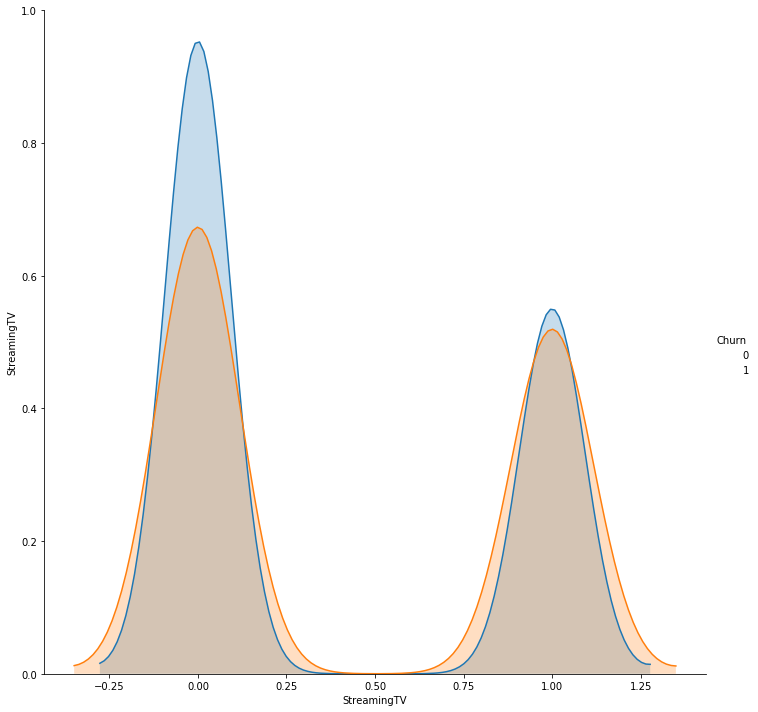

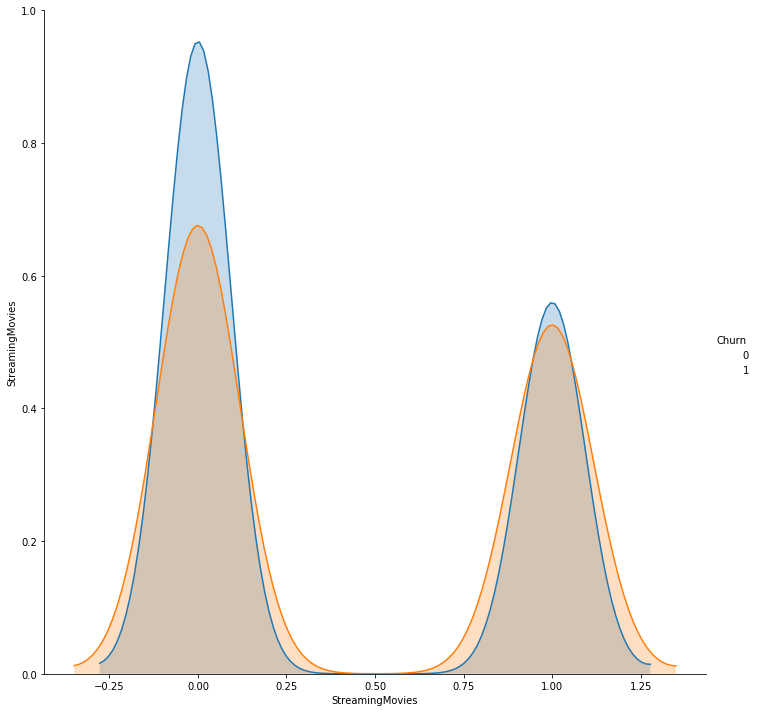

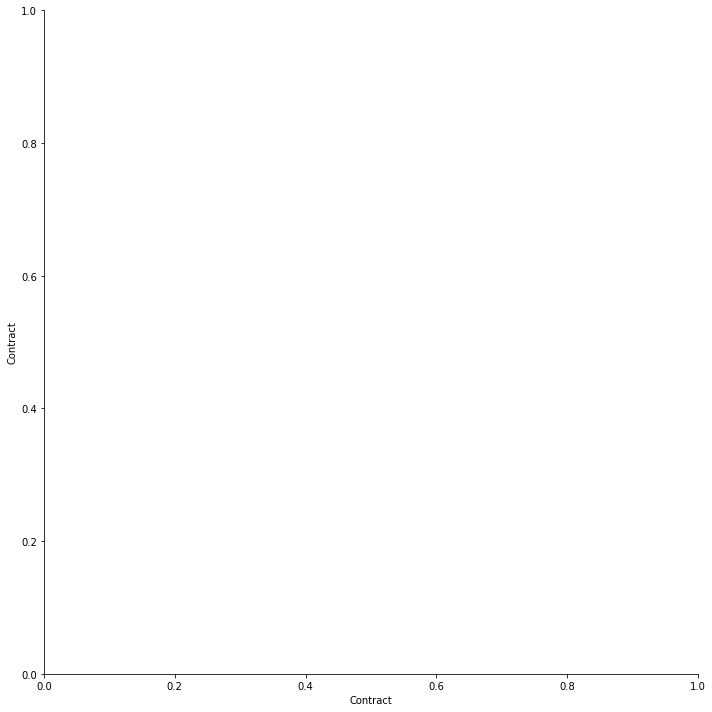

In [110]:
no = ['gender', 'InternetService', 'PaymentMethod']
for i in range(15):
    if ntelcom.columns[i] in no:
        continue
    else:
        sns.pairplot(ntelcom, y_vars=ntelcom.columns[i], x_vars=ntelcom.columns[i], height=10, hue='Churn')